In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 2013 SFO Customer Survey

SFO conducts a yearly comprehensive survey of our guests to gauge satisfaction with our facilities, services, and amenities. SFO compares results to previous surveys to look for areas of improvement and discover elements of the guest experience that are not satisfactory.

## Data Organizing

In [2]:
# Load in the data set
customer = pd.read_csv('/home/yungshun/workspace/py3/feature-understanding/datasets/2013_SFO_Customer_Survey.csv')

In [3]:
# Get a sense of how many rows of data there are, if there are any missing values, and what data type each column has
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 95 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q2PURP2            3459 non-null float64
Q2PURP3            163 non-null float64
Q2PURP4            17 non-null float64
Q2PURP5            2 non-null float64
Q2PURP6            0 non-null float64
Q3GETTO1           3535 non-null int64
Q3GETTO2           3505 non-nul

In [4]:
# Another method to check for missing values
customer.isnull().sum()

RESPNUM               0
CCGID                 0
RUN                   0
INTDATE               0
GATE                  0
STRATA                0
PEAK                  0
METHOD                0
AIRLINE               0
FLIGHT                0
DEST                  0
DESTGEO               0
DESTMARK              0
ARRTIME               0
DEPTIME               0
Q2PURP1               0
Q2PURP2              76
Q2PURP3            3372
Q2PURP4            3518
Q2PURP5            3533
Q2PURP6            3535
Q3GETTO1              0
Q3GETTO2             30
Q3GETTO3           3518
Q3GETTO4           3534
Q3GETTO5           3535
Q3GETTO6           3535
Q3PARK             3251
Q4BAGS                0
Q4BUY                 0
                   ... 
Q10COM3            3521
Q11A_USEWEB           0
Q11B_USESFOAPP        0
Q11C_USEOTHAPP        0
Q11D_USESOCMED        0
Q11E_USEWIFI          0
Q12COM1            2829
Q12COM2            3460
Q12COM3            3533
Q13_WHEREDEPART       0
Q13_RATEGETTO   

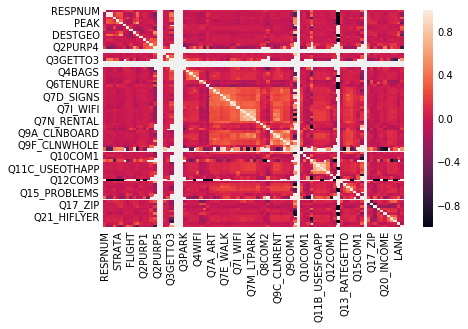

In [5]:
sns.heatmap(customer.corr())

## Data Cleaning

In [6]:
# Here we will remove the columns that contain those missing values for now
customer.dropna(axis=1, inplace=True)

In [7]:
customer.isnull().sum()

RESPNUM            0
CCGID              0
RUN                0
INTDATE            0
GATE               0
STRATA             0
PEAK               0
METHOD             0
AIRLINE            0
FLIGHT             0
DEST               0
DESTGEO            0
DESTMARK           0
ARRTIME            0
DEPTIME            0
Q2PURP1            0
Q3GETTO1           0
Q4BAGS             0
Q4BUY              0
Q4FOOD             0
Q4WIFI             0
Q5FLYPERYR         0
Q6TENURE           0
SAQ                0
Q7A_ART            0
Q7B_FOOD           0
Q7C_SHOPS          0
Q7D_SIGNS          0
Q7E_WALK           0
Q7F_SCREENS        0
                  ..
Q7M_LTPARK         0
Q7N_RENTAL         0
Q7O_WHOLE          0
Q9A_CLNBOARD       0
Q9B_CLNAIRTRAIN    0
Q9C_CLNRENT        0
Q9D_CLNFOOD        0
Q9E_CLNBATH        0
Q9F_CLNWHOLE       0
Q10SAFE            0
Q11A_USEWEB        0
Q11B_USESFOAPP     0
Q11C_USEOTHAPP     0
Q11D_USESOCMED     0
Q11E_USEWIFI       0
Q13_WHEREDEPART    0
Q13_RATEGETTO

In [8]:
# Columns with null values got dropped (went from 95 columns to 66)
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 66 columns):
RESPNUM            3535 non-null int64
CCGID              3535 non-null object
RUN                3535 non-null int64
INTDATE            3535 non-null int64
GATE               3535 non-null int64
STRATA             3535 non-null int64
PEAK               3535 non-null int64
METHOD             3535 non-null int64
AIRLINE            3535 non-null int64
FLIGHT             3535 non-null int64
DEST               3535 non-null int64
DESTGEO            3535 non-null int64
DESTMARK           3535 non-null int64
ARRTIME            3535 non-null object
DEPTIME            3535 non-null object
Q2PURP1            3535 non-null int64
Q3GETTO1           3535 non-null int64
Q4BAGS             3535 non-null int64
Q4BUY              3535 non-null int64
Q4FOOD             3535 non-null int64
Q4WIFI             3535 non-null int64
Q5FLYPERYR         3535 non-null int64
Q6TENURE           3535 non-null

In [9]:
customer.describe().T

,count,mean,std,min,25%,50%,75%,max
RESPNUM,3535.0,2119.889392,1385.474407,1.000000,886.500000,2137.000000,3168.500000,9995.000000
RUN,3535.0,1960.375389,458.893056,1201.000000,1605.500000,1918.000000,2403.000000,2806.000000
INTDATE,3535.0,9.431966,4.561762,2.000000,6.000000,9.000000,14.000000,18.000000
GATE,3535.0,52.635078,34.075357,1.000000,21.000000,52.000000,87.000000,102.000000
STRATA,3535.0,1.977652,0.778393,1.000000,1.000000,2.000000,3.000000,3.000000
PEAK,3535.0,2.117115,0.767092,1.000000,2.000000,2.000000,3.000000,3.000000
METHOD,3535.0,1.011315,0.115993,1.000000,1.000000,1.000000,1.000000,3.000000
AIRLINE,3535.0,23.683734,11.515232,2.000000,14.000000,29.000000,33.000000,38.000000
FLIGHT,3535.0,1187.998868,1407.551713,1.000000,387.000000,758.000000,1404.000000,6455.000000
DEST,3535.0,57.254597,30.339705,2.000000,32.000000,55.000000,88.000000,106.000000


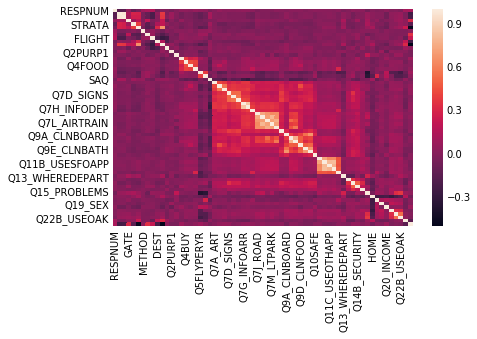

In [10]:
sns.heatmap(customer.corr())